# 2. Gender and Educational Outcomes

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import  utils as utils
df = pd.read_feather("./data/changed_books_home.feather")

In [87]:
pd.set_option("display.float_format", "{:.3f}".format)
df.info()
gender_groupby = df.groupby("Gender_Student")
gender_groupby["Gender_Student"].describe()

<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 5089
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Gender_Student                                3875 non-null   category
 1   Lang_Spoken_Home                              3875 non-null   category
 2   Books_Home                                    3875 non-null   category
 3   Own_Computer                                  3875 non-null   category
 4   Shared_Computer                               3875 non-null   category
 5   Smartphone                                    3875 non-null   category
 6   Internet_Access                               3875 non-null   category
 7   Study_Desk                                    3875 non-null   category
 8   Own_Room                                      3875 non-null   category
 9   ParentA_Edu_Level                             3875 non-nu

/tmp/ipykernel_51539/2339349719.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_groupby = df.groupby("Gender_Student")


,count,unique,top,freq
Gender_Student,,,,
Others,114,1,Others,114
Boy,1922,1,Boy,1922
Girl,1839,1,Girl,1839


## 2.1 Subject PV scores  and Gender

### 2.1.1 Science Scores and Gender

In [88]:
sciencePVmask = df.columns.str.contains("PV_SCIENCE")

df[df.columns[sciencePVmask]]

,1ST_PV_SCIENCE,2ND_PV_SCIENCE,3RD_PV_SCIENCE,4TH_PV_SCIENCE,5TH_PV_SCIENCE
0,657.630,627.234,644.163,645.779,658.878
1,581.948,558.027,559.051,604.619,575.339
2,523.903,528.941,587.872,556.344,524.626
3,483.950,450.426,494.457,468.772,437.093
4,625.163,518.019,554.934,527.351,541.177
...,...,...,...,...,...
5083,653.057,678.412,662.800,615.974,624.485
5084,658.147,717.625,645.664,657.993,650.975
5087,541.745,504.058,538.503,527.208,553.642
5088,586.743,579.045,616.620,611.577,598.166


In [89]:
df["AVERAGE_PV_SCIENCE"] = df[df.columns[sciencePVmask]].mean(axis=1)
df["AVERAGE_PV_SCIENCE"]


0      646.737
1      575.797
2      544.337
3      466.939
4      553.329
         ...  
5083   646.946
5084   666.081
5087   533.031
5088   598.430
5089   544.257
Name: AVERAGE_PV_SCIENCE, Length: 3875, dtype: float64

In [90]:
gender_groupby = df.groupby("Gender_Student", observed=False)
gender_groupby["AVERAGE_PV_SCIENCE"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender_Student,,,,,,,,
Others,114.000,558.946,74.615,372.597,502.282,560.214,609.176,727.939
Boy,1922.000,552.182,73.827,288.094,502.782,555.313,605.463,742.875
Girl,1839.000,536.361,73.085,291.265,487.681,539.984,587.719,734.663


<Axes: xlabel='Gender_Student', ylabel='AVERAGE_PV_SCIENCE'>

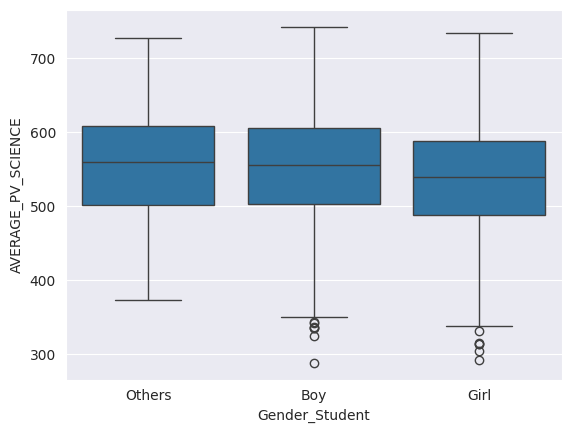

In [91]:
sns.boxplot(data=df, x="Gender_Student", y="AVERAGE_PV_SCIENCE",)




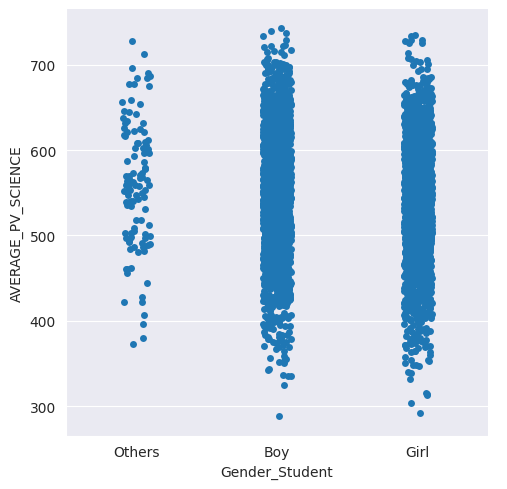

In [92]:

sns.catplot(data=df, x="Gender_Student", y="AVERAGE_PV_SCIENCE" , kind="strip" )




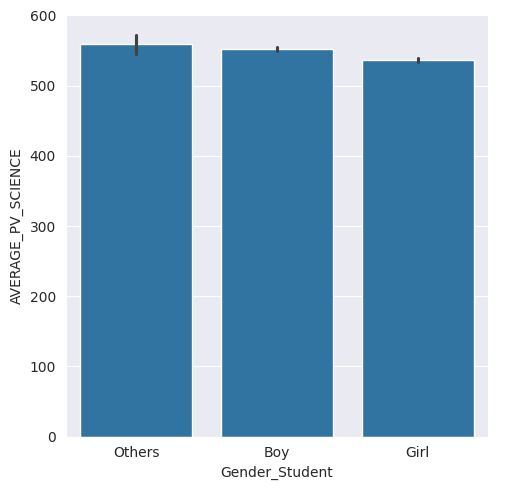

In [93]:
sns.catplot(data=df, x="Gender_Student", y="AVERAGE_PV_SCIENCE", kind="bar")

### 2.1.2 Mathematics score and Gender

In [94]:
mathematicsPVmask  = df.columns.str.contains("PV_MATHEMATICS")
df[df.columns[mathematicsPVmask]]

,1ST_PV_MATHEMATICS,2ND_PV_MATHEMATICS,3RD_PV_MATHEMATICS,4TH_PV_MATHEMATICS,5TH_PV_MATHEMATICS
0,579.283,619.611,629.987,635.762,622.213
1,499.417,562.871,509.805,540.811,520.445
2,488.278,492.506,490.169,495.675,514.515
3,463.965,504.572,518.852,473.879,464.771
4,510.432,511.267,503.706,509.153,527.268
...,...,...,...,...,...
5083,612.285,646.457,625.945,608.129,631.501
5084,609.512,616.654,655.984,637.698,624.200
5087,535.212,530.170,517.522,545.993,538.011
5088,599.597,601.209,565.950,578.871,558.165


In [95]:
df["AVERAGE_PV_MATHEMATICS"] = df[df.columns[mathematicsPVmask]].mean(axis=1)
df["AVERAGE_PV_MATHEMATICS"]

0      617.371
1      526.670
2      496.229
3      485.208
4      512.365
         ...  
5083   624.864
5084   628.810
5087   533.381
5088   580.758
5089   568.369
Name: AVERAGE_PV_MATHEMATICS, Length: 3875, dtype: float64

In [96]:
gender_groupby["AVERAGE_PV_MATHEMATICS"].describe()


,count,mean,std,min,25%,50%,75%,max
Gender_Student,,,,,,,,
Others,114.000,541.419,61.501,404.503,499.378,541.067,582.802,704.830
Boy,1922.000,545.726,68.067,331.648,501.816,549.874,593.103,753.279
Girl,1839.000,527.348,69.808,307.604,480.737,529.798,576.216,720.251


<Axes: xlabel='Gender_Student', ylabel='AVERAGE_PV_MATHEMATICS'>

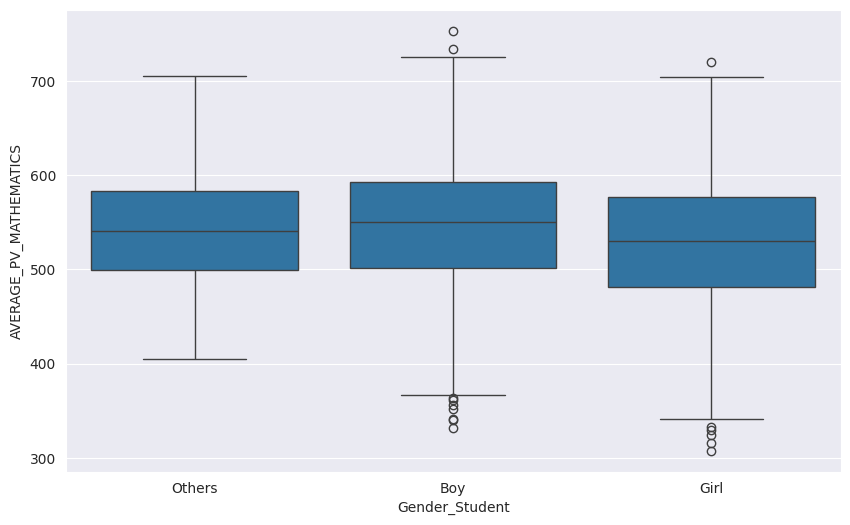

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,x="Gender_Student", y="AVERAGE_PV_MATHEMATICS")


<Figure size 1000x600 with 0 Axes>

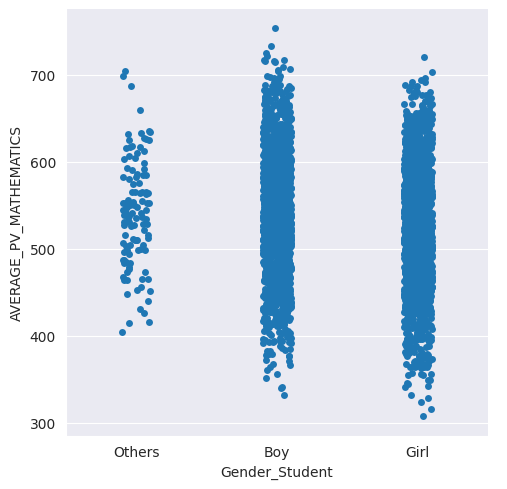

In [98]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x="Gender_Student", y="AVERAGE_PV_MATHEMATICS" ,kind="strip")

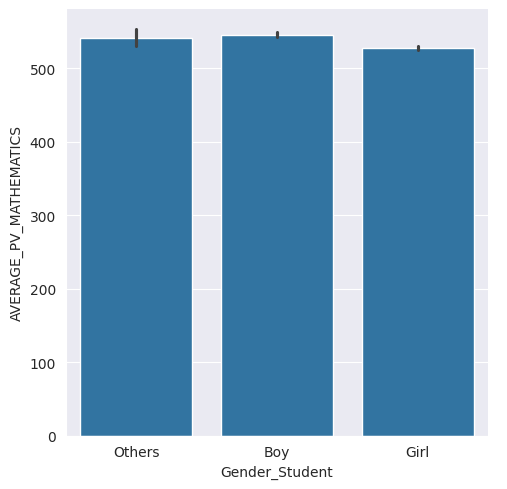

In [99]:
sns.catplot(data=df, x="Gender_Student", y="AVERAGE_PV_MATHEMATICS" ,kind="bar")

### 2.1.3 Biology Score and Gender

In [100]:
pv_biology_mask = df.columns.str.contains("PV_BIOLOGY")
df[df.columns[pv_biology_mask]]

,1ST_PV_BIOLOGY,2ND_PV_BIOLOGY,3RD_PV_BIOLOGY,4TH_PV_BIOLOGY,5TH_PV_BIOLOGY
0,657.004,590.696,638.950,591.144,629.628
1,517.679,549.864,543.184,520.069,552.732
2,512.604,601.377,605.167,558.942,541.263
3,489.747,397.280,408.689,402.108,404.807
4,531.796,574.122,489.489,536.465,554.719
...,...,...,...,...,...
5083,575.256,640.272,680.336,669.328,593.957
5084,748.311,699.152,651.868,697.396,614.355
5087,514.706,570.534,535.531,502.528,455.362
5088,625.089,546.177,556.277,553.812,624.444


In [101]:
df["AVERAGE_PV_BIOLOGY"] = df[df.columns[pv_biology_mask]].mean(axis=1)
df["AVERAGE_PV_BIOLOGY"]

0      621.484
1      536.706
2      563.871
3      420.526
4      537.318
         ...  
5083   631.830
5084   682.216
5087   515.732
5088   581.160
5089   543.396
Name: AVERAGE_PV_BIOLOGY, Length: 3875, dtype: float64

In [102]:
gender_groupby["AVERAGE_PV_BIOLOGY"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender_Student,,,,,,,,
Others,114.000,559.386,81.502,350.689,505.295,570.845,612.471,730.914
Boy,1922.000,547.611,80.469,251.796,494.527,551.167,604.993,777.098
Girl,1839.000,530.992,80.385,287.960,478.344,532.998,588.173,769.100


<Axes: xlabel='Gender_Student', ylabel='AVERAGE_PV_BIOLOGY'>

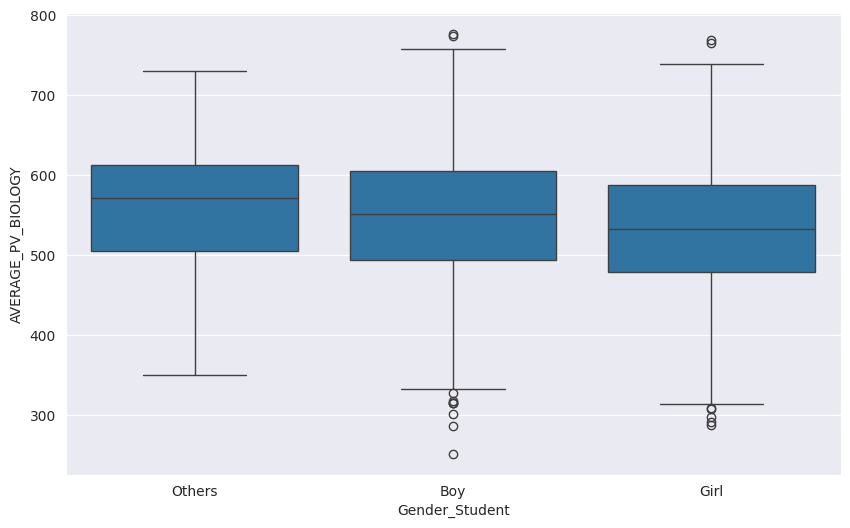

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Gender_Student", y="AVERAGE_PV_BIOLOGY")

<Figure size 1000x600 with 0 Axes>

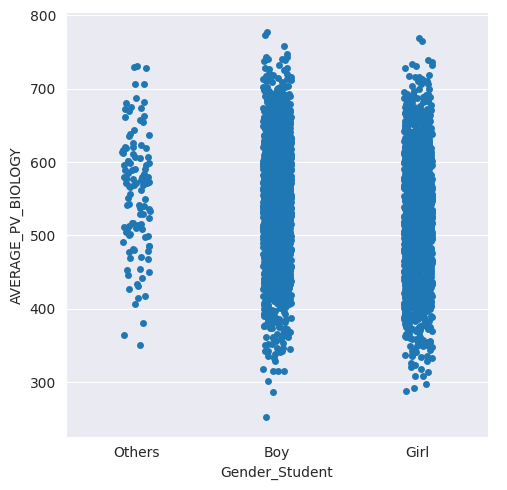

In [104]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x="Gender_Student", y="AVERAGE_PV_BIOLOGY", kind="strip")

<Figure size 1000x600 with 0 Axes>

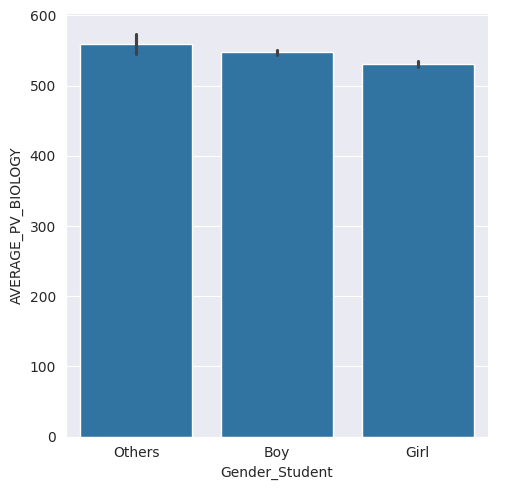

In [105]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x="Gender_Student", y="AVERAGE_PV_BIOLOGY", kind="bar")

### 2.1.4 Chemistry Score and Gender


In [106]:
chemistry_pv_mask  = df.columns.str.contains("PV_CHEMISTRY")
df[df.columns[chemistry_pv_mask]]

,1ST_PV_CHEMISTRY,2ND_PV_CHEMISTRY,3RD_PV_CHEMISTRY,4TH_PV_CHEMISTRY,5TH_PV_CHEMISTRY
0,632.763,656.303,639.609,587.379,630.071
1,645.902,630.175,608.498,609.105,609.306
2,513.215,535.293,554.844,522.960,520.364
3,521.746,428.013,440.916,471.165,468.778
4,537.127,544.071,558.634,558.505,523.101
...,...,...,...,...,...
5083,589.246,645.580,610.705,682.589,623.862
5084,704.735,724.124,612.411,608.300,618.012
5087,536.214,547.027,521.264,520.943,513.554
5088,623.101,534.635,539.246,590.696,576.119


In [107]:
df["AVERAGE_PV_CHEMISTRY"] = df[df.columns[chemistry_pv_mask]].mean(axis=1)
df["AVERAGE_PV_CHEMISTRY"]

0      629.225
1      620.597
2      529.335
3      466.124
4      544.287
         ...  
5083   630.396
5084   653.516
5087   527.800
5088   572.759
5089   573.258
Name: AVERAGE_PV_CHEMISTRY, Length: 3875, dtype: float64

In [108]:
gender_groupby["AVERAGE_PV_CHEMISTRY"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender_Student,,,,,,,,
Others,114.000,551.356,78.643,370.858,491.230,557.118,611.551,771.919
Boy,1922.000,548.023,72.952,242.952,498.284,551.854,599.408,758.184
Girl,1839.000,548.500,71.417,295.389,503.083,550.929,598.838,743.070


<Axes: xlabel='Gender_Student', ylabel='AVERAGE_PV_CHEMISTRY'>

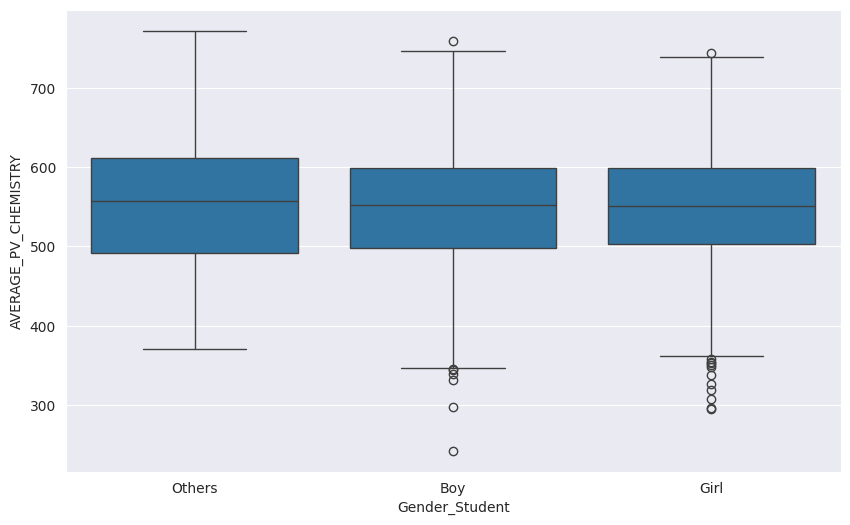

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df , x="Gender_Student", y="AVERAGE_PV_CHEMISTRY")

<Figure size 1000x600 with 0 Axes>

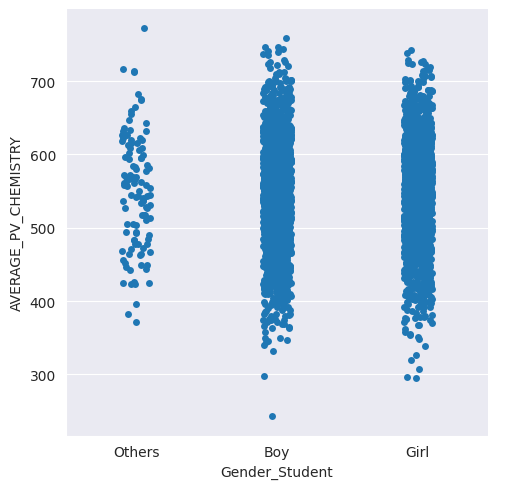

In [110]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x="Gender_Student", y="AVERAGE_PV_CHEMISTRY", kind="strip")

<Figure size 1000x600 with 0 Axes>

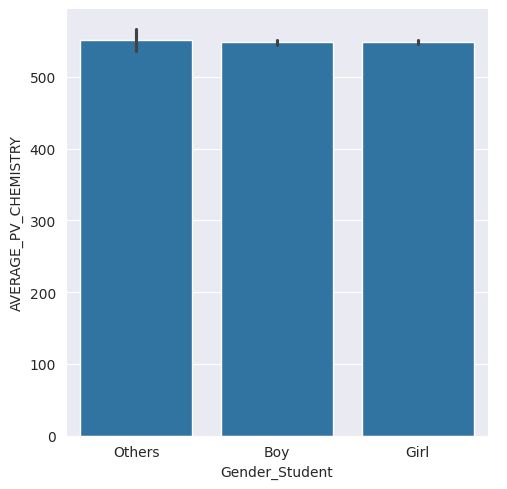

In [111]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x="Gender_Student", y="AVERAGE_PV_CHEMISTRY", kind="bar")

### 2.1.5 Physics Score and Gender

In [112]:
physics_pv_mask  = df.columns.str.contains("PV_PHYSICS")
df[df.columns[physics_pv_mask]]

,1ST_PV_PHYSICS,3RD_PV_PHYSICS,4TH_PV_PHYSICS,5TH_PV_PHYSICS
0,626.148,626.049,555.927,610.968
1,627.662,584.463,519.644,572.024
2,461.601,518.725,494.944,499.211
3,497.043,477.424,465.875,486.077
4,546.729,507.819,549.612,522.169
...,...,...,...,...
5083,608.016,641.508,653.216,602.289
5084,709.549,676.868,719.518,668.309
5087,592.829,624.246,606.125,563.322
5088,656.934,621.421,637.334,668.485


In [113]:
df["AVERAGE_PV_PHYSICS"] = df[df.columns[physics_pv_mask]].mean(axis=1)
gender_groupby["AVERAGE_PV_PHYSICS"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender_Student,,,,,,,,
Others,114.000,552.418,76.641,370.630,507.267,550.487,593.801,768.960
Boy,1922.000,553.085,77.710,282.453,499.257,556.627,606.878,769.433
Girl,1839.000,526.925,76.176,235.032,476.507,530.956,579.723,737.106


<Axes: xlabel='Gender_Student', ylabel='AVERAGE_PV_PHYSICS'>

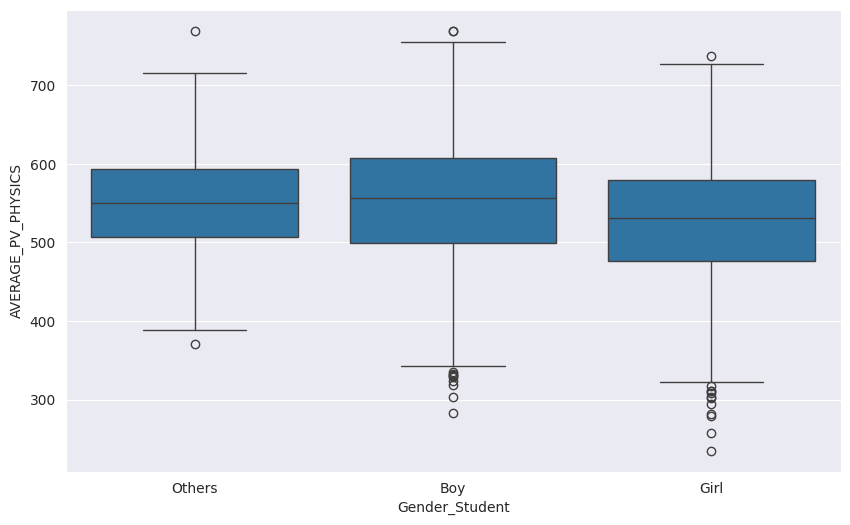

In [114]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df , x="Gender_Student", y="AVERAGE_PV_PHYSICS")

<Figure size 1000x600 with 0 Axes>

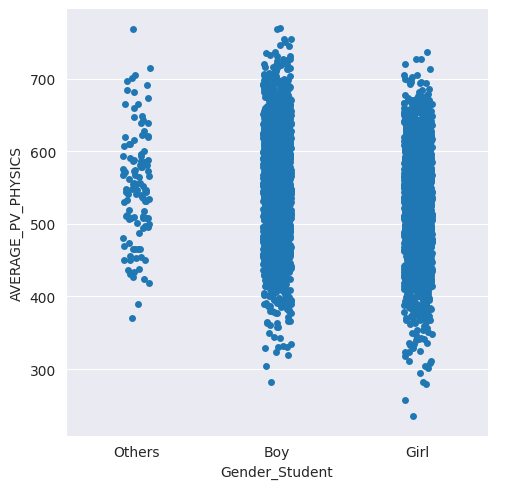

In [115]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x="Gender_Student", y="AVERAGE_PV_PHYSICS", kind="strip")

<Figure size 1000x600 with 0 Axes>

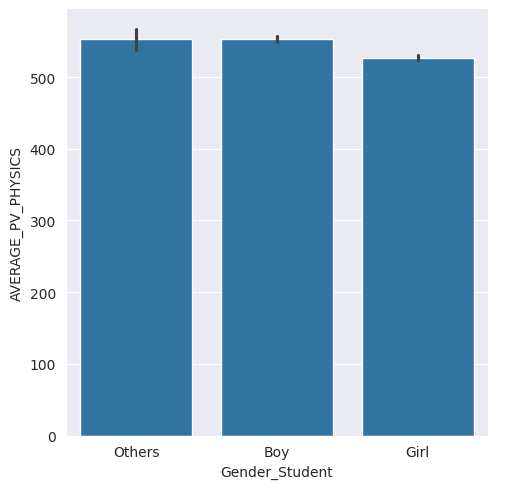

In [116]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x="Gender_Student", y="AVERAGE_PV_PHYSICS", kind="bar")

### 2.1.6 Earth Science Score and Gender

In [117]:
earthscience_pv_mask = df.columns.str.contains("PV_EARTH_SCIENCE")
df[df.columns[earthscience_pv_mask]]

,1ST_PV_EARTH_SCIENCE,2ND_PV_EARTH_SCIENCE,3RD_PV_EARTH_SCIENCE,4TH_PV_EARTH_SCIENCE,5TH_PV_EARTH_SCIENCE
0,599.950,611.035,604.534,537.316,608.475
1,581.948,600.513,590.533,629.056,582.809
2,477.013,490.654,511.414,503.668,502.433
3,441.019,391.353,395.717,436.722,410.642
4,557.623,576.582,543.599,559.614,595.900
...,...,...,...,...,...
5083,625.132,687.066,706.214,719.801,656.761
5084,720.816,684.391,647.849,655.003,612.550
5087,451.156,519.215,537.878,476.706,471.571
5088,643.454,586.261,599.877,611.619,625.676


In [118]:
df["AVERAGE_PV_EARTH_SCIENCE"] = df[df.columns[earthscience_pv_mask]].mean(axis=1)
df["AVERAGE_PV_EARTH_SCIENCE"]

0      592.262
1      596.971
2      497.036
3      415.091
4      566.664
         ...  
5083   678.995
5084   664.122
5087   491.305
5088   613.377
5089   543.298
Name: AVERAGE_PV_EARTH_SCIENCE, Length: 3875, dtype: float64

In [119]:
gender_groupby["AVERAGE_PV_EARTH_SCIENCE"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender_Student,,,,,,,,
Others,114.000,566.149,75.411,354.486,511.732,571.314,617.227,763.703
Boy,1922.000,564.042,72.441,252.950,519.005,566.715,614.544,771.381
Girl,1839.000,543.880,73.810,292.409,494.153,547.108,595.543,770.795


<Axes: xlabel='Gender_Student', ylabel='AVERAGE_PV_EARTH_SCIENCE'>

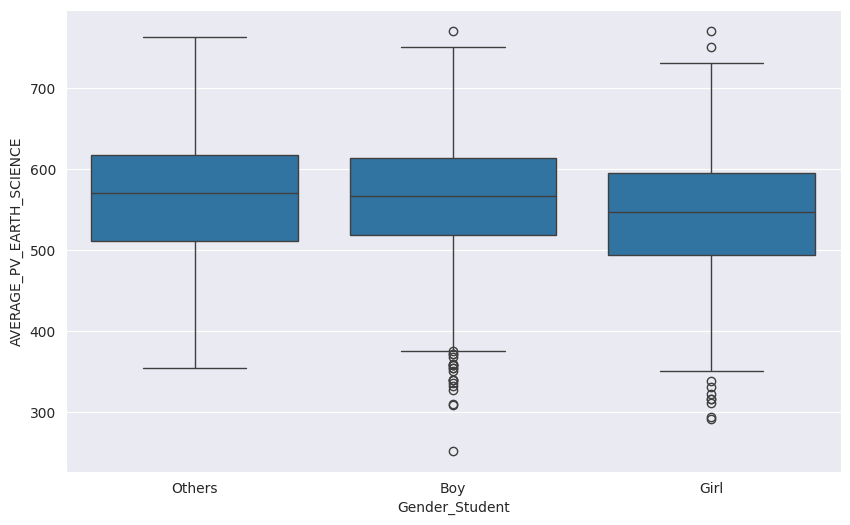

In [120]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df , x="Gender_Student", y="AVERAGE_PV_EARTH_SCIENCE")


<Figure size 1000x600 with 0 Axes>

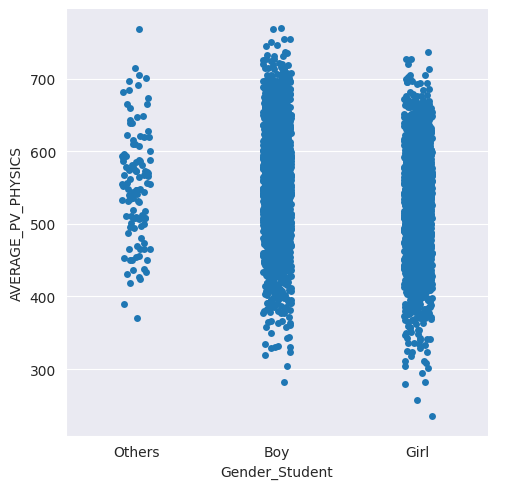

In [121]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x="Gender_Student", y="AVERAGE_PV_PHYSICS", kind="strip")


<Figure size 1000x600 with 0 Axes>

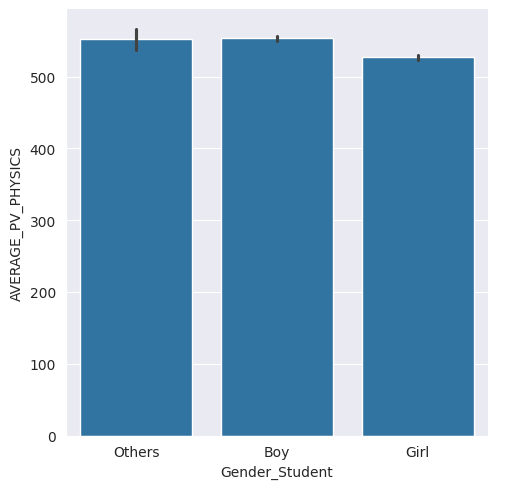

In [122]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df, x="Gender_Student", y="AVERAGE_PV_PHYSICS", kind="bar")


## 2.2 Subject Performance by Gender

### 2.2.1 Best Performance by Gender (90th and above percentile)

#### 2.2.1.1 Best performace by Gender in Science

In [123]:
science_90th_percentile = df["AVERAGE_PV_SCIENCE"].quantile(0.90)

In [124]:
best_science_performers = df[df["AVERAGE_PV_SCIENCE"] >= science_90th_percentile]
gender_performance = best_science_performers.groupby("Gender_Student", observed=False)
gender_performance["Gender_Student"].describe()

,count,unique,top,freq
Gender_Student,,,,
Others,16,1,Others,16
Boy,233,1,Boy,233
Girl,139,1,Girl,139


<Axes: xlabel='Gender_Student', ylabel='AVERAGE_PV_SCIENCE'>

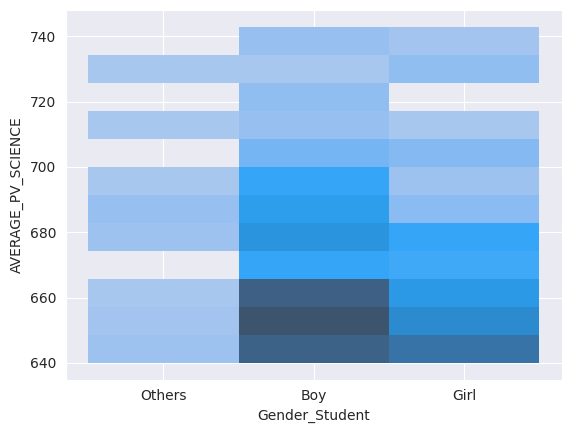

In [125]:
sns.histplot(data=best_science_performers,x="Gender_Student", y="AVERAGE_PV_SCIENCE")

<Axes: xlabel='Gender_Student', ylabel='count'>

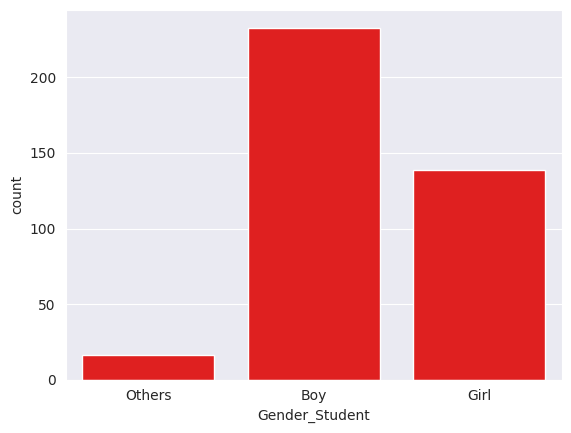

In [126]:
sns.countplot(data=best_science_performers, x="Gender_Student" , color="r")

#### 2.2.1.2 Best performace by Gender in Mathematics

In [127]:
maths_90th_percentile = df["AVERAGE_PV_MATHEMATICS"].quantile(0.90)

In [128]:
maths_best_performers = df[df["AVERAGE_PV_MATHEMATICS"] >= maths_90th_percentile]
gender_performance_math = maths_best_performers.groupby("Gender_Student", observed=False)
gender_performance_math["Gender_Student"].describe()

,count,unique,top,freq
Gender_Student,,,,
Others,12,1,Others,12
Boy,228,1,Boy,228
Girl,148,1,Girl,148


Text(0.5, 0, 'Gender')

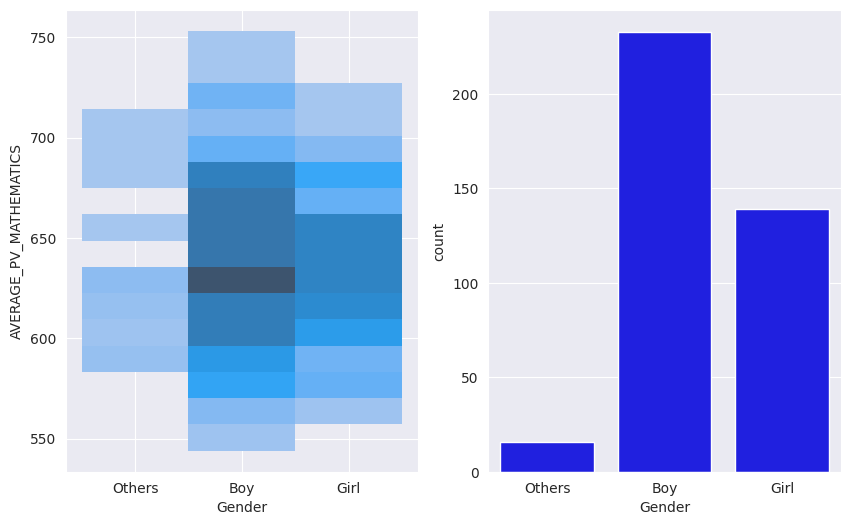

In [129]:
fig, ax = plt.subplots(1,2, figsize=(10, 6))
sns.histplot(data=best_science_performers,x="Gender_Student", y="AVERAGE_PV_MATHEMATICS", ax=ax[0])
ax[0].set_xlabel("Gender")
sns.countplot(data=best_science_performers, x="Gender_Student" , color="b",ax=ax[1])
ax[1].set_xlabel("Gender")

#### 2.2.1.3 Best performace by Gender in Biology

In [130]:
bio_90th_percentile = df["AVERAGE_PV_BIOLOGY"].quantile(0.90)
best_bio_performers = df[df["AVERAGE_PV_BIOLOGY"] >= bio_90th_percentile]
gender_performance_bio = best_bio_performers.groupby("Gender_Student", observed=False)
gender_performance_bio["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,17,1,Others,17
Boy,223,1,Boy,223
Girl,148,1,Girl,148


Text(0.5, 0, 'Gender')

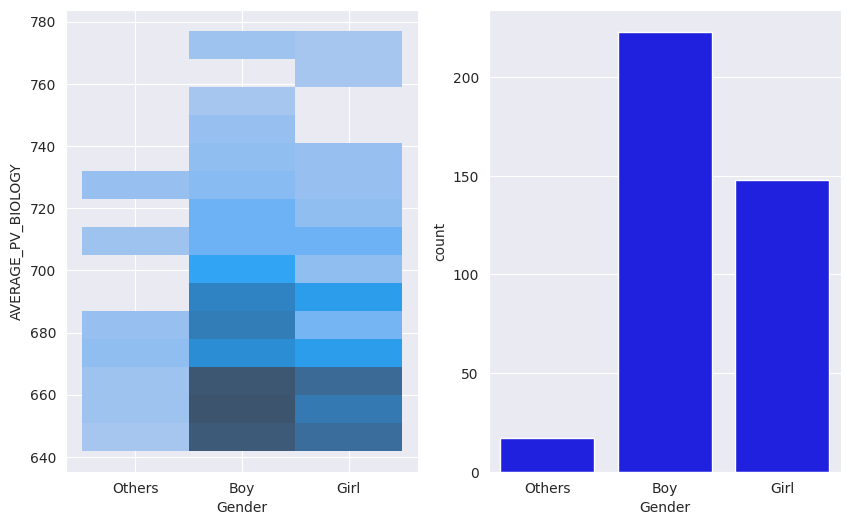

In [131]:
fig, ax = plt.subplots(1,2, figsize=(10, 6))
sns.histplot(data=best_bio_performers,x="Gender_Student", y="AVERAGE_PV_BIOLOGY", ax=ax[0])
ax[0].set_xlabel("Gender")
sns.countplot(data=best_bio_performers, x="Gender_Student" , color="b",ax=ax[1])
ax[1].set_xlabel("Gender")

#### 2.2.1.4 Best performace by Gender in Chemistry

In [132]:
chem_90th_percentile = df["AVERAGE_PV_CHEMISTRY"].quantile(0.90)
best_chem_performers = df[df["AVERAGE_PV_CHEMISTRY"] >= chem_90th_percentile]
gender_performance_chem = best_chem_performers.groupby("Gender_Student", observed=False)
gender_performance_chem["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,12,1,Others,12
Boy,183,1,Boy,183
Girl,193,1,Girl,193


Text(0.5, 0, 'Gender')

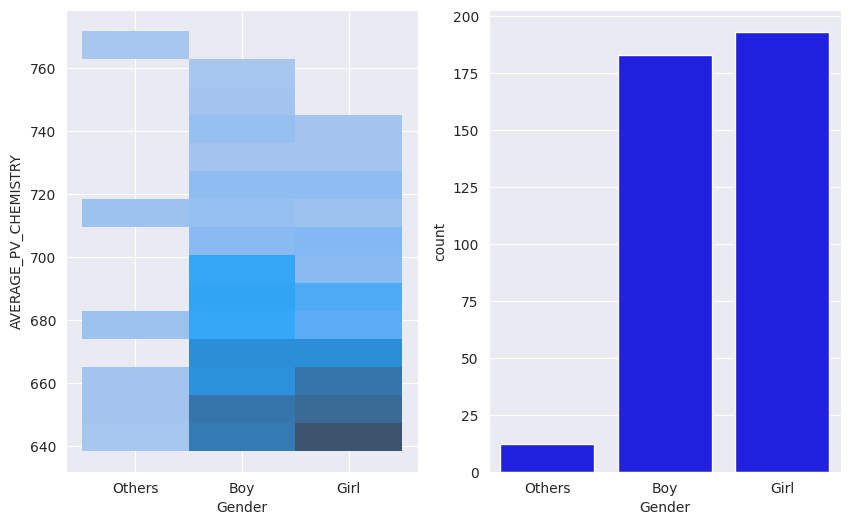

In [133]:
fig, ax = plt.subplots(1,2, figsize=(10, 6))
sns.histplot(data=best_chem_performers,x="Gender_Student", y="AVERAGE_PV_CHEMISTRY", ax=ax[0])
ax[0].set_xlabel("Gender")
sns.countplot(data=best_chem_performers, x="Gender_Student" , color="b",ax=ax[1])
ax[1].set_xlabel("Gender")

#### 2.2.1.5 Best performace by Gender in Physics

In [134]:
phy_90th_percentile = df["AVERAGE_PV_PHYSICS"].quantile(0.90)
best_phy_performers = df[df["AVERAGE_PV_PHYSICS"] >= phy_90th_percentile]
gender_performance_phy = best_chem_performers.groupby("Gender_Student", observed=False)
gender_performance_phy["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,12,1,Others,12
Boy,183,1,Boy,183
Girl,193,1,Girl,193


Text(0.5, 0, 'Gender')

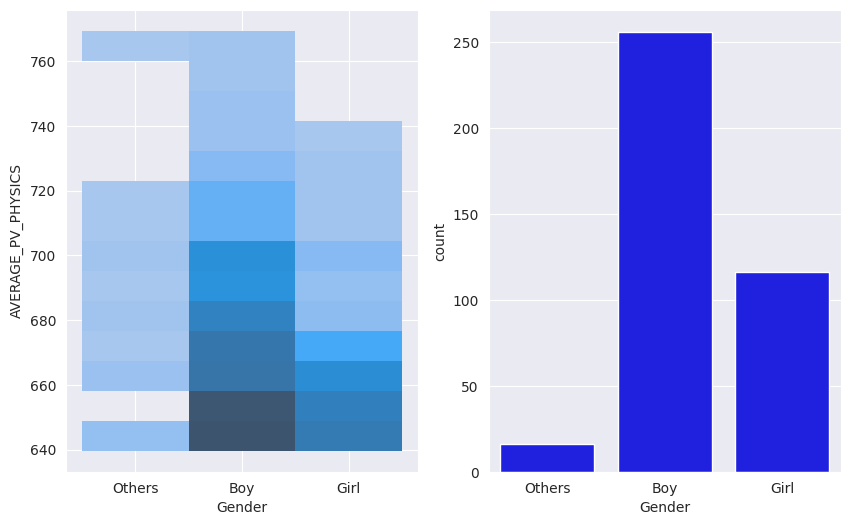

In [135]:
fig, ax = plt.subplots(1,2, figsize=(10, 6))
sns.histplot(data=best_phy_performers,x="Gender_Student", y="AVERAGE_PV_PHYSICS", ax=ax[0])
ax[0].set_xlabel("Gender")
sns.countplot(data=best_phy_performers, x="Gender_Student" , color="b",ax=ax[1])
ax[1].set_xlabel("Gender")

#### 2.2.1.6 Best performace by Gender in Earth Science

In [136]:
earth_90th_percentile = df["AVERAGE_PV_EARTH_SCIENCE"].quantile(0.90)
best_earth_performers = df[df["AVERAGE_PV_EARTH_SCIENCE"] >= earth_90th_percentile]
gender_performance_earth = best_earth_performers.groupby("Gender_Student", observed=False)
gender_performance_earth["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,16,1,Others,16
Boy,231,1,Boy,231
Girl,141,1,Girl,141


Text(0.5, 0, 'Gender')

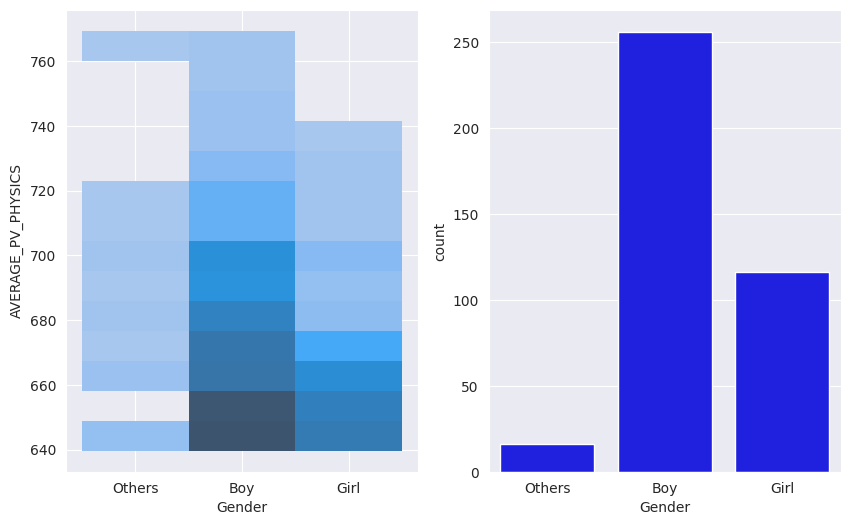

In [137]:
fig, ax = plt.subplots(1,2, figsize=(10, 6))
sns.histplot(data=best_phy_performers,x="Gender_Student", y="AVERAGE_PV_PHYSICS", ax=ax[0])
ax[0].set_xlabel("Gender")
sns.countplot(data=best_phy_performers, x="Gender_Student" , color="b",ax=ax[1])
ax[1].set_xlabel("Gender")

In [138]:
### 2.2.2 Bad Performance by Gender (10th and below 10th percentile)

#### 2.2.2.1 Bad permformance in Science by Gender

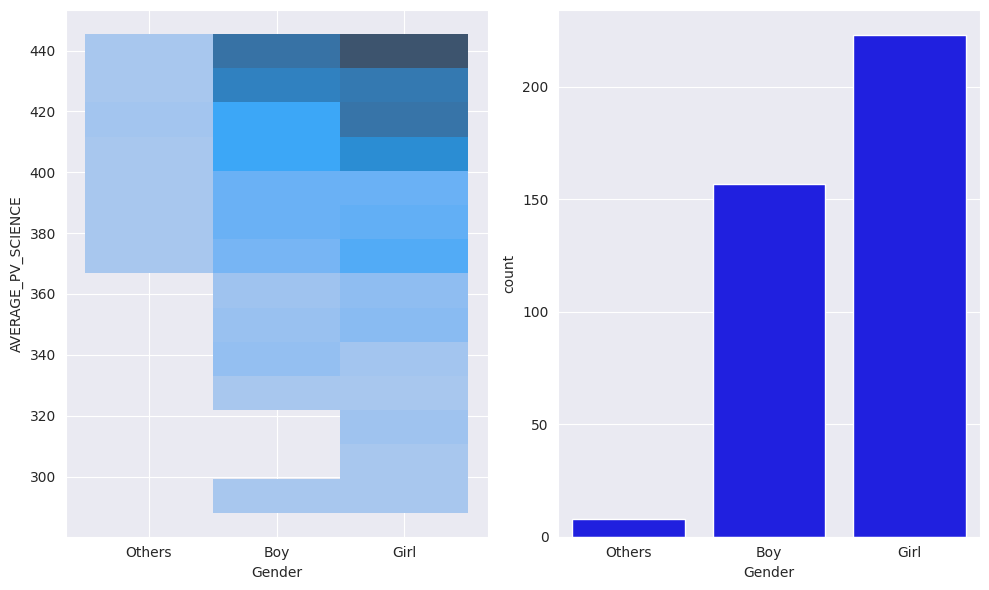

,count,unique,top,freq
Gender_Student,,,,
Others,8,1,Others,8
Boy,157,1,Boy,157
Girl,223,1,Girl,223


In [139]:
bad_science_performance , gender_groupby = utils.getBadPerformersByGender(df, "AVERAGE_PV_SCIENCE")
gender_groupby.describe()


#### 2.2.2.2 Bad Performance in MatheMatics by Gender

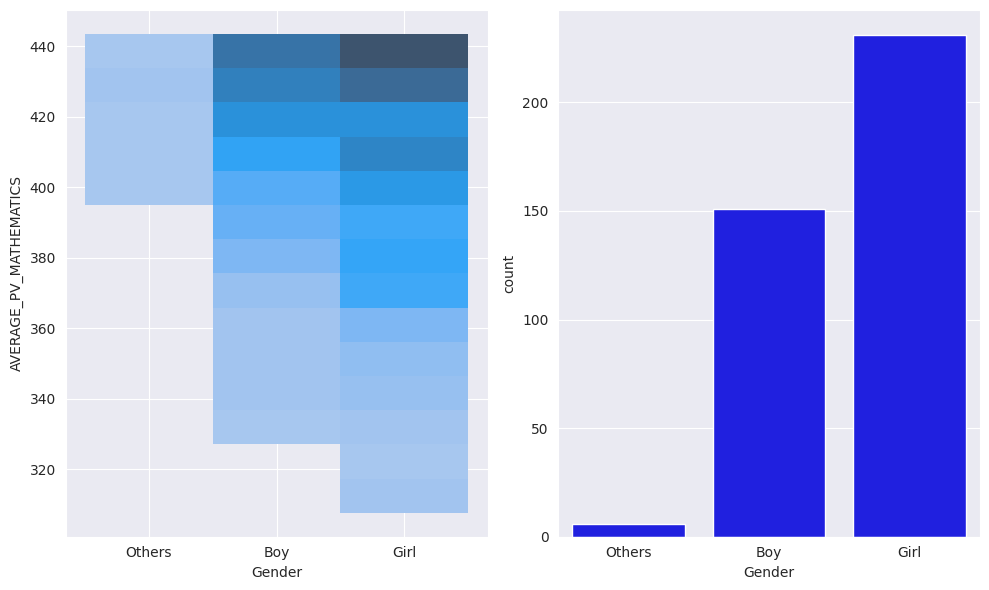

,count,unique,top,freq
Gender_Student,,,,
Others,6,1,Others,6
Boy,151,1,Boy,151
Girl,231,1,Girl,231


In [140]:
bad_maths_performance , gender_groupby = utils.getBadPerformersByGender(df, "AVERAGE_PV_MATHEMATICS")
gender_groupby.describe()


#### 2.2.2.3 Bad performance in Biology By Gender


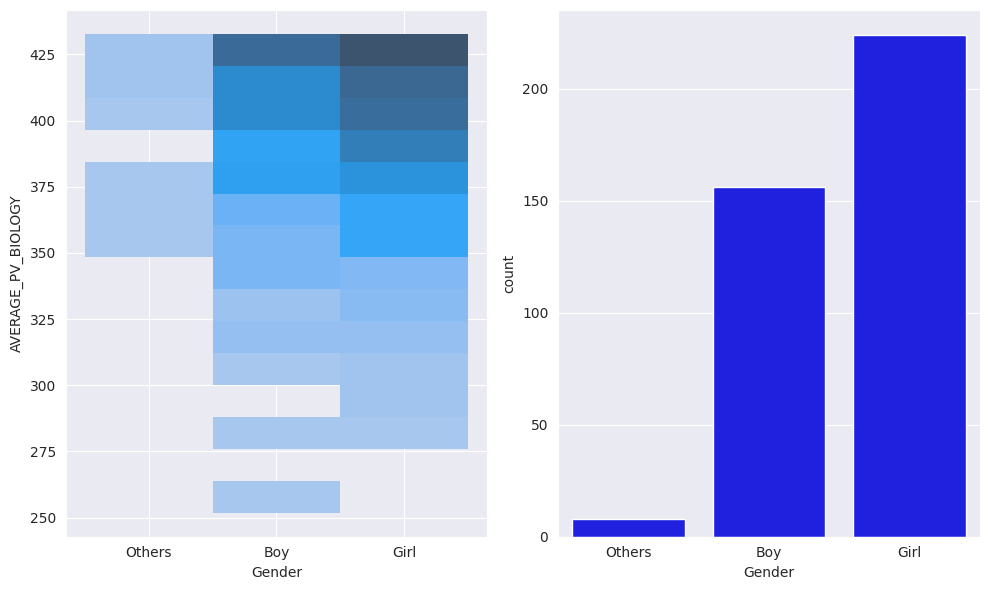

,count,unique,top,freq
Gender_Student,,,,
Others,8,1,Others,8
Boy,156,1,Boy,156
Girl,224,1,Girl,224


In [141]:
bad_bio_performance , gender_groupby = utils.getBadPerformersByGender(df, "AVERAGE_PV_BIOLOGY")
gender_groupby.describe()

#### 2.2.2.4 Bad performance in Chemistry By Gender


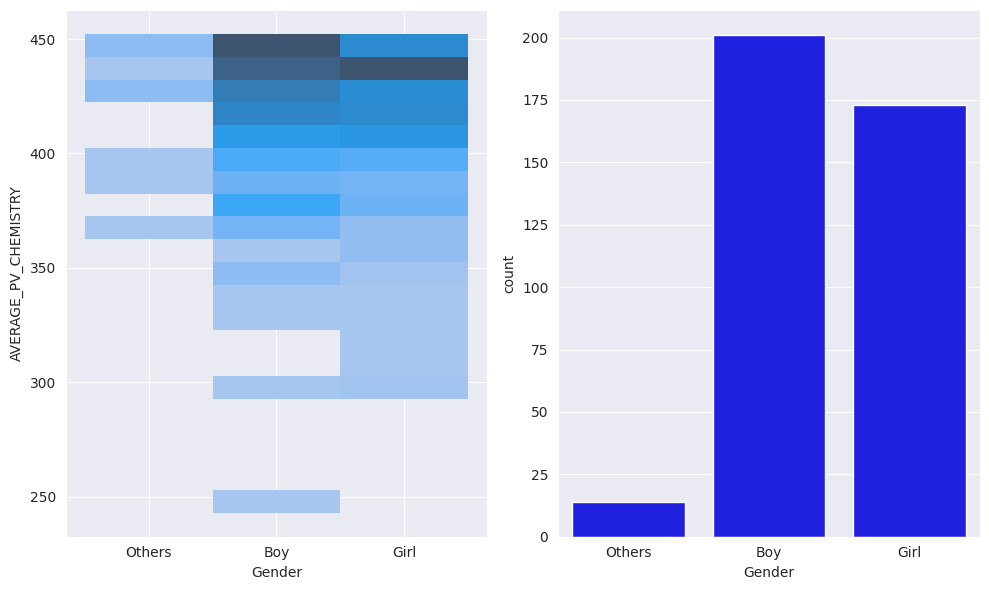

,count,unique,top,freq
Gender_Student,,,,
Others,14,1,Others,14
Boy,201,1,Boy,201
Girl,173,1,Girl,173


In [142]:
bad_chem_performance , gender_groupby = utils.getBadPerformersByGender(df, "AVERAGE_PV_CHEMISTRY")
gender_groupby.describe()

#### 2.2.2.5 Bad performance in Physics By Gender


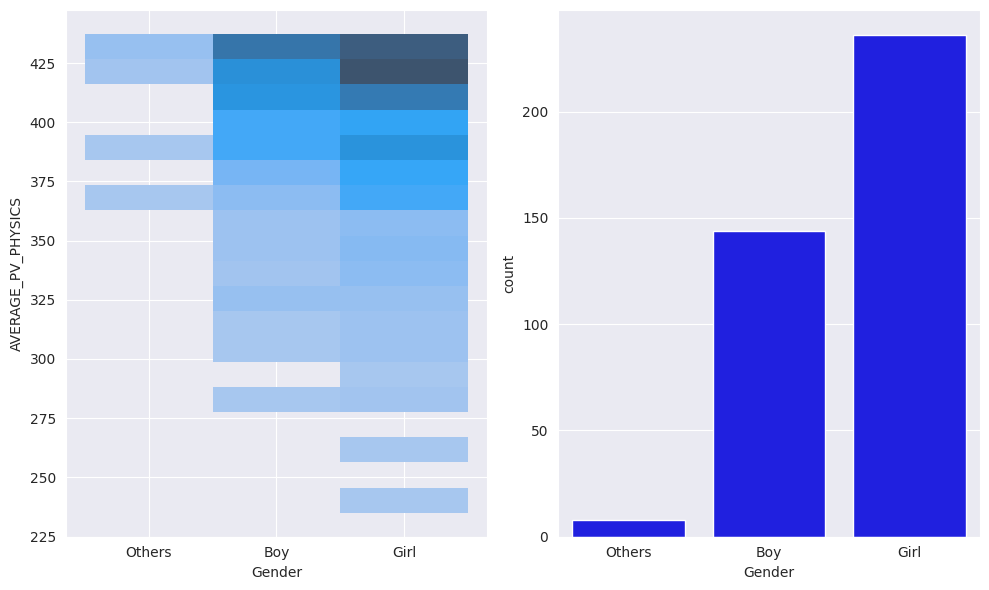

,count,unique,top,freq
Gender_Student,,,,
Others,8,1,Others,8
Boy,144,1,Boy,144
Girl,236,1,Girl,236


In [143]:
bad_phy_performance , gender_groupby = utils.getBadPerformersByGender(df, "AVERAGE_PV_PHYSICS")
gender_groupby.describe()

##### 2.2.2.6 Bad performance in Earth Science by Gender


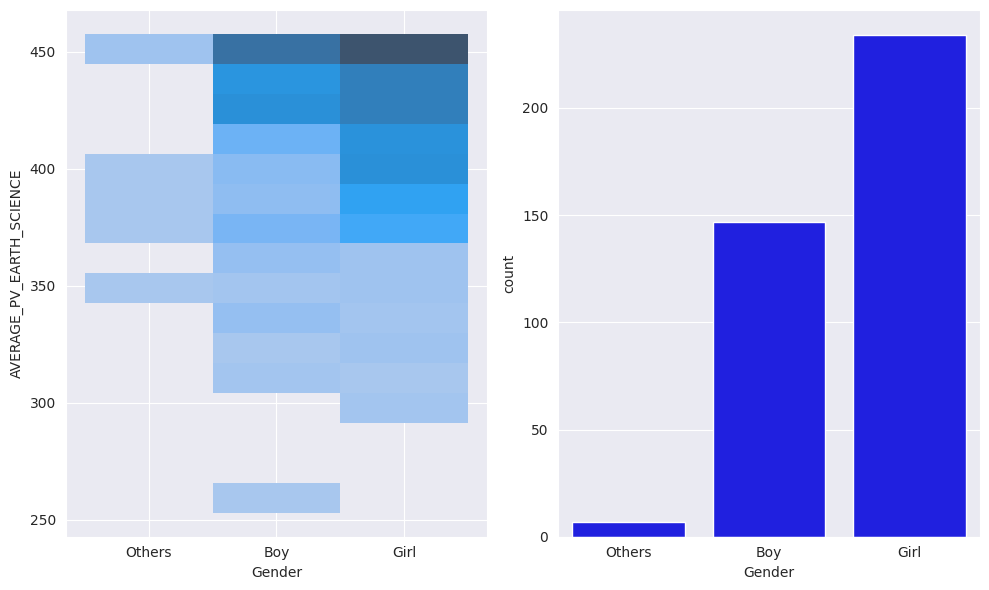

,count,unique,top,freq
Gender_Student,,,,
Others,7,1,Others,7
Boy,147,1,Boy,147
Girl,234,1,Girl,234


In [144]:
bad_es_performance , gender_groupby = utils.getBadPerformersByGender(df, "AVERAGE_PV_EARTH_SCIENCE")
gender_groupby.describe()


### 2.2.3 Distribution of Moderate Performances by Gender (Performances greater than 10th percentile and less than 90th percentile)


#### 2.2.3.1 Moderate(Values > 10th Percentile and Values < 90th percentile) Performances in Science by gender

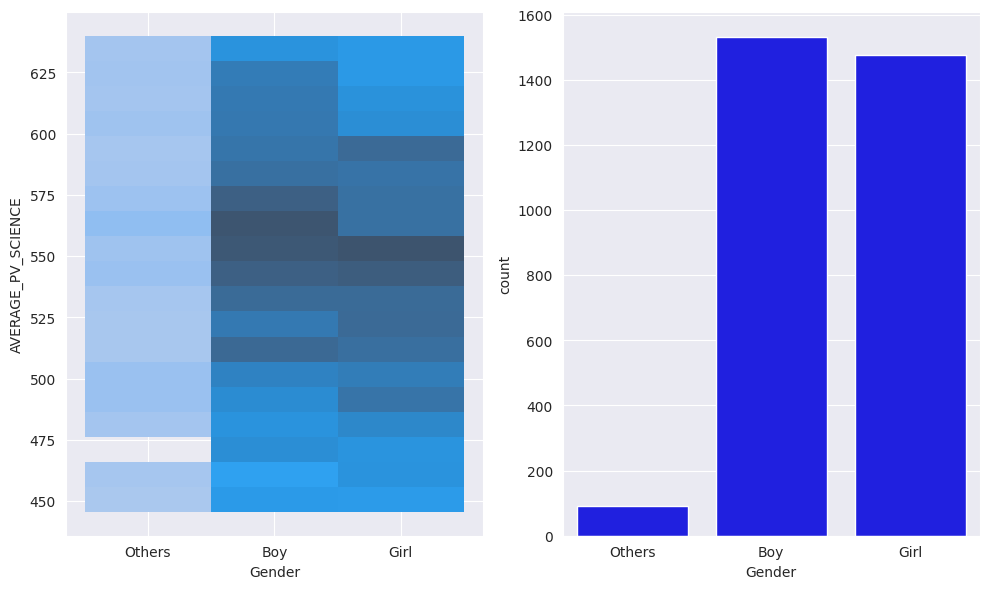

,count,unique,top,freq
Gender_Student,,,,
Others,90,1,Others,90
Boy,1532,1,Boy,1532
Girl,1477,1,Girl,1477


In [145]:
moderate_science, grouped_by_gender = utils.performanceDistributioninIQRbyGender(df, "AVERAGE_PV_SCIENCE")
grouped_by_gender.describe()

#### 2.2.3.2 Moderate(Values > 10th Percentile and Values < 90th percentile) Performances in Mathematics by gender

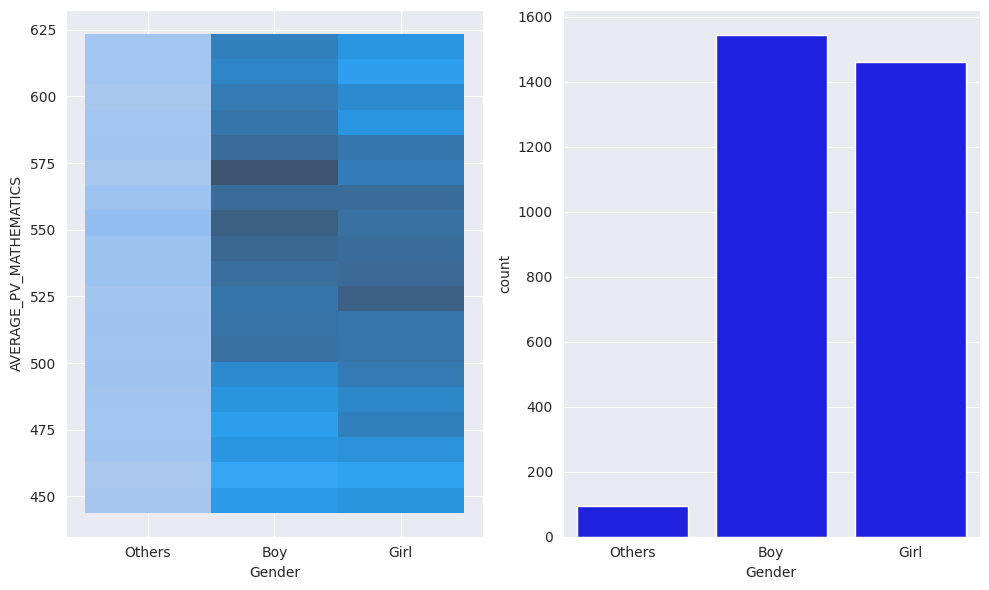

,count,unique,top,freq
Gender_Student,,,,
Others,96,1,Others,96
Boy,1543,1,Boy,1543
Girl,1460,1,Girl,1460


In [146]:
moderate_maths, grouped_by_gender = utils.performanceDistributioninIQRbyGender(df, "AVERAGE_PV_MATHEMATICS")
grouped_by_gender.describe()

#### 2.2.3.3 Moderate(Values > 10th Percentile and Values < 90th percentile) Performances in Biology by gender

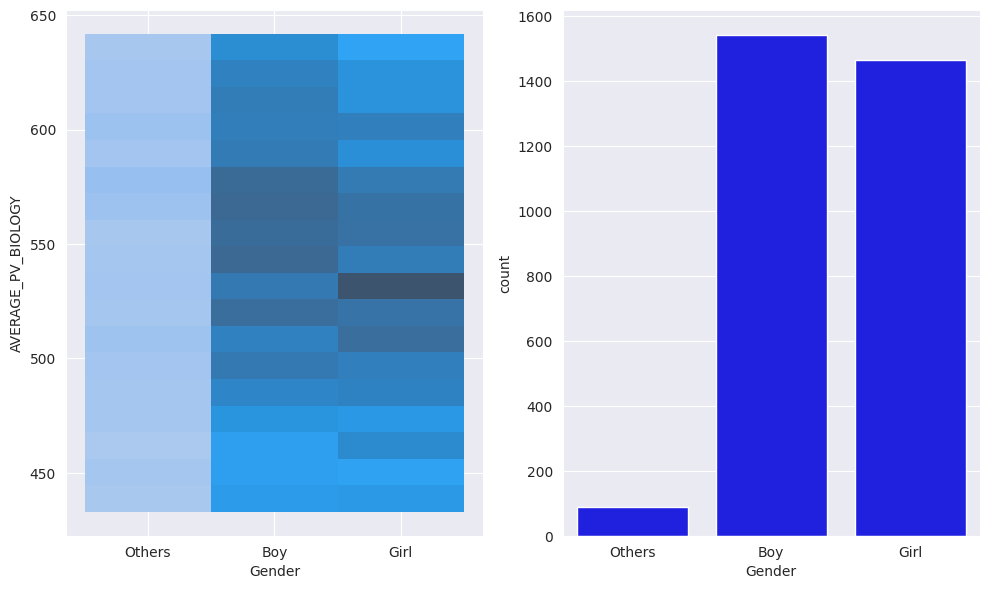

,count,unique,top,freq
Gender_Student,,,,
Others,89,1,Others,89
Boy,1543,1,Boy,1543
Girl,1467,1,Girl,1467


In [147]:
moderate_bio, grouped_by_gender = utils.performanceDistributioninIQRbyGender(df, "AVERAGE_PV_BIOLOGY")
grouped_by_gender.describe()

#### 2.2.3.4 Moderate(Values > 10th Percentile and Values < 90th percentile) Performances in Chemistry by gender

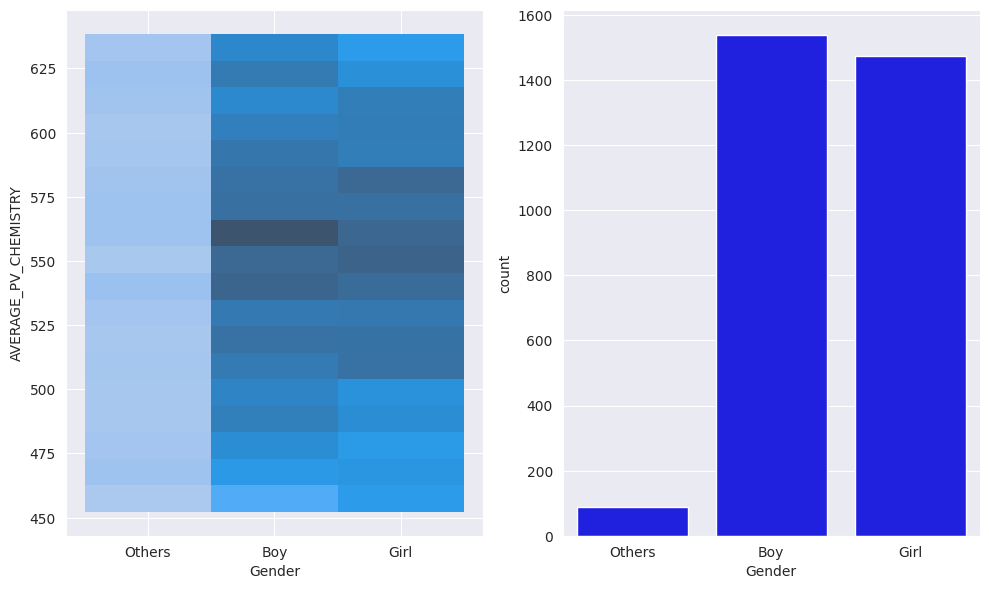

,count,unique,top,freq
Gender_Student,,,,
Others,88,1,Others,88
Boy,1538,1,Boy,1538
Girl,1473,1,Girl,1473


In [148]:
moderate_chem, grouped_by_gender = utils.performanceDistributioninIQRbyGender(df, "AVERAGE_PV_CHEMISTRY")
grouped_by_gender.describe()

#### 2.2.3.5 Moderate(Values > 10th Percentile and Values < 90th percentile) Performances in Physics by gender

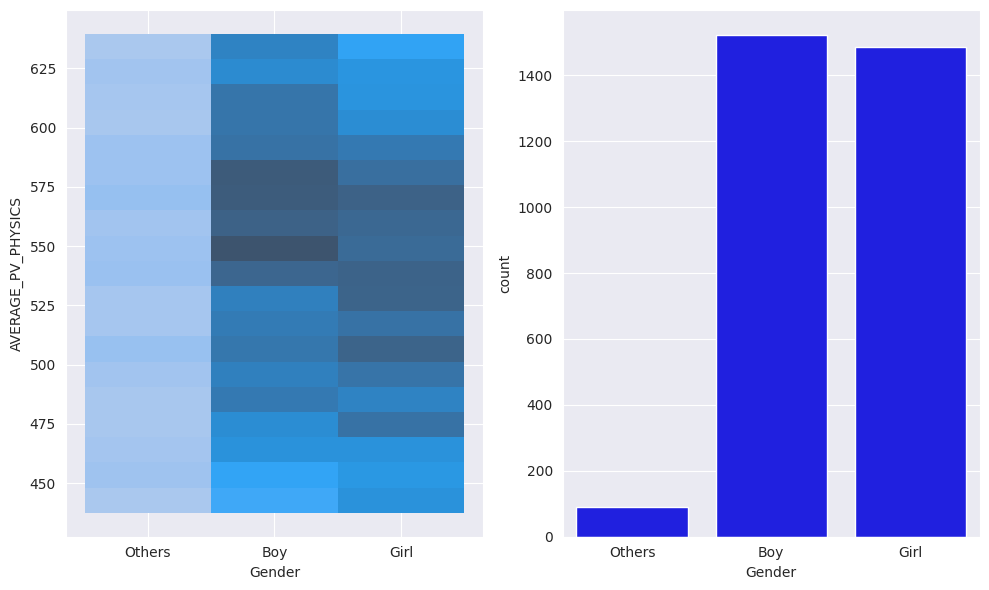

,count,unique,top,freq
Gender_Student,,,,
Others,90,1,Others,90
Boy,1522,1,Boy,1522
Girl,1487,1,Girl,1487


In [149]:
moderate_phy, grouped_by_gender = utils.performanceDistributioninIQRbyGender(df, "AVERAGE_PV_PHYSICS")
grouped_by_gender.describe()

#### 2.2.3.2 Moderate(Values > 10th Percentile and Values < 90th percentile) Performances in Mathematics by gender`

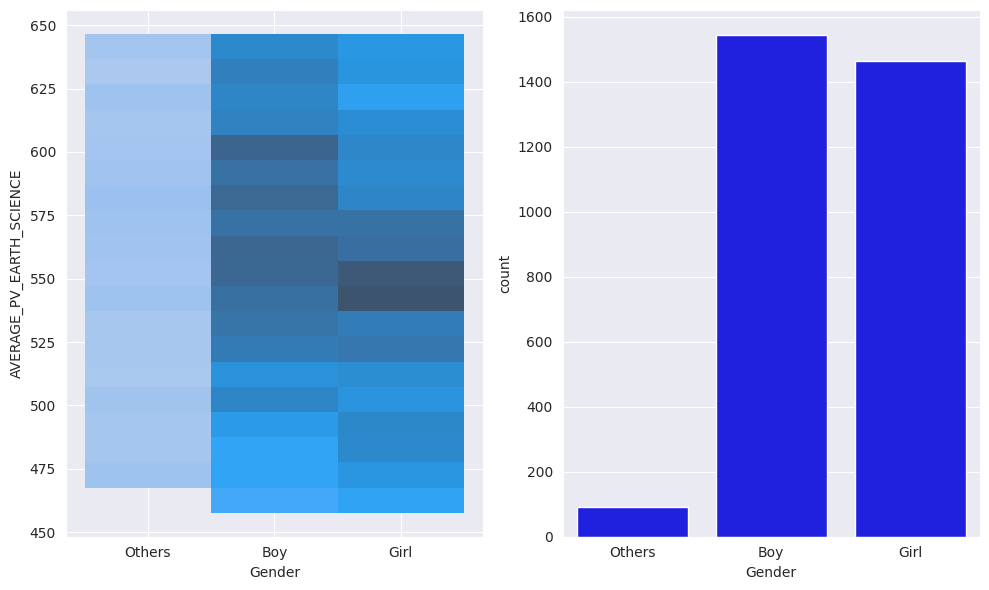

,count,unique,top,freq
Gender_Student,,,,
Others,91,1,Others,91
Boy,1544,1,Boy,1544
Girl,1464,1,Girl,1464


In [150]:
moderate_es, grouped_by_gender = utils.performanceDistributioninIQRbyGender(df, "AVERAGE_PV_EARTH_SCIENCE")
grouped_by_gender.describe()

## 2.3 Overall Performances by Gender

### 2.3.1 Overall Best Performers across subjects by Gender(Belong to the 70+ Percentile in all subjects)

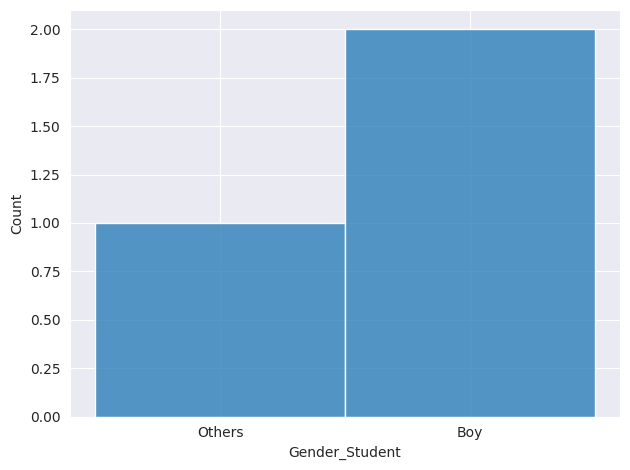

,count,unique,top,freq
Gender_Student,,,,
Others,1,1,Others,1
Boy,2,1,Boy,2
Girl,0,0,NaN,NaN


In [151]:
overall_best = utils.getOverallBestorWorst(df, 0.70)
overall_best.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()

### 2.3.2 Overall  Performance across subjects by Gender(Belong to the 50+ Percentile in all subjects)

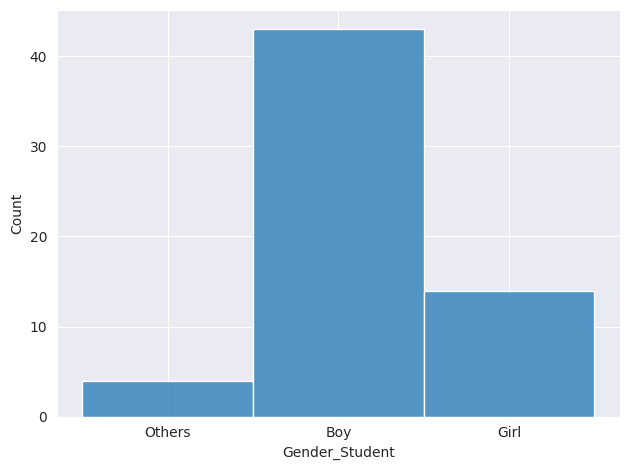

,count,unique,top,freq
Gender_Student,,,,
Others,4,1,Others,4
Boy,43,1,Boy,43
Girl,14,1,Girl,14


In [152]:
overall_best = utils.getOverallBestorWorst(df, 0.50)
overall_best.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()

### 2.3.3 Overall  Performance across subjects by Gender(Belong to the 40+ Percentile in all subjects)

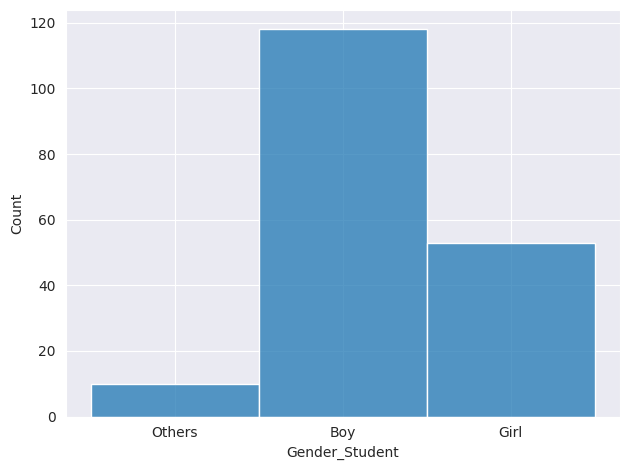

,count,unique,top,freq
Gender_Student,,,,
Others,10,1,Others,10
Boy,118,1,Boy,118
Girl,53,1,Girl,53


In [153]:
overall_best = utils.getOverallBestorWorst(df, 0.40)
overall_best.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()

### 2.3.4 Overall Performance across subjects by Gender(Belong to 10 Percentile or less in all subjects)

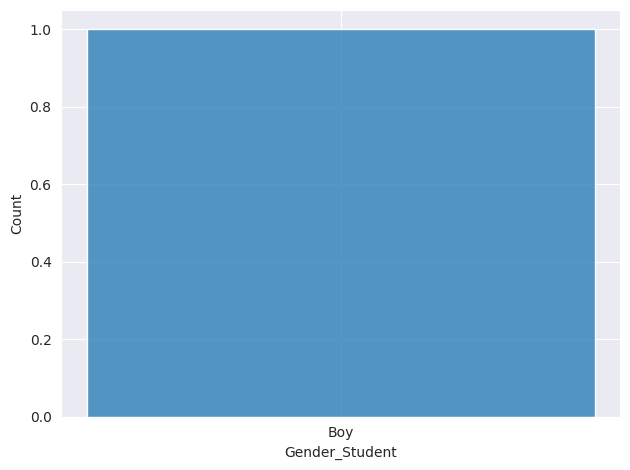

,count,unique,top,freq
Gender_Student,,,,
Others,0,0,NaN,NaN
Boy,1,1,Boy,1
Girl,0,0,NaN,NaN


In [154]:
overall_best = utils.getOverallBestorWorst(df, 0.10)
overall_best.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()

### 2.3.5 Belong to the 70 percentile or above in at least one subject

In [155]:
phy_above_70 = df["AVERAGE_PV_PHYSICS"] >= df["AVERAGE_PV_PHYSICS"].quantile(0.70)
sci_above_70 = df["AVERAGE_PV_SCIENCE"] >= df["AVERAGE_PV_SCIENCE"].quantile(0.70)
maths_above_70 =df["AVERAGE_PV_MATHEMATICS"] >= df["AVERAGE_PV_MATHEMATICS"].quantile(0.70)
chem_above_70 = df["AVERAGE_PV_CHEMISTRY"] >= df["AVERAGE_PV_CHEMISTRY"].quantile(0.70)
bio_above_70 = df["AVERAGE_PV_BIOLOGY"] >= df["AVERAGE_PV_BIOLOGY"].quantile(0.70)
es_above_70 = df["AVERAGE_PV_EARTH_SCIENCE"] >= df["AVERAGE_PV_EARTH_SCIENCE"].quantile(0.70)

seventy_atleast_one = df[phy_above_70 | sci_above_70 | chem_above_70 | bio_above_70 | es_above_70 | maths_above_70]
seventy_atleast_one.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,59,1,Others,59
Boy,957,1,Boy,957
Girl,763,1,Girl,763


<Axes: xlabel='Gender_Student', ylabel='count'>

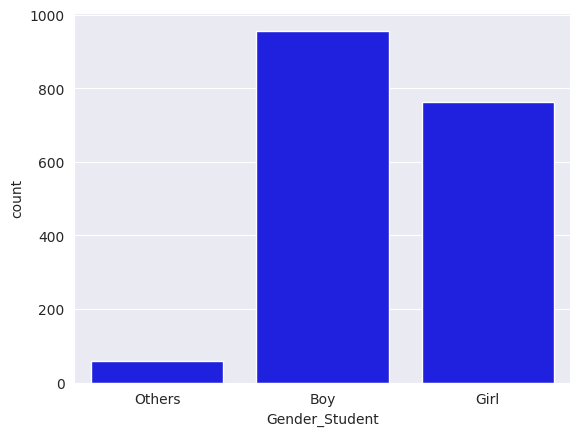

In [156]:
sns.countplot(data=seventy_atleast_one, x="Gender_Student" , color="b")

### 2.3.6 Belong to the 10 percentile or less in at least one subject

In [157]:
phy_below_10 = df["AVERAGE_PV_PHYSICS"] <= df["AVERAGE_PV_PHYSICS"].quantile(0.10)
sci_below_10 = df["AVERAGE_PV_SCIENCE"] <= df["AVERAGE_PV_SCIENCE"].quantile(0.70)
maths_below_10 =df["AVERAGE_PV_MATHEMATICS"] <= df["AVERAGE_PV_MATHEMATICS"].quantile(0.70)
chem_below_10 = df["AVERAGE_PV_CHEMISTRY"] <= df["AVERAGE_PV_CHEMISTRY"].quantile(0.70)
bio_below_10 = df["AVERAGE_PV_BIOLOGY"] <= df["AVERAGE_PV_BIOLOGY"].quantile(0.70)
es_below_10 = df["AVERAGE_PV_EARTH_SCIENCE"] <= df["AVERAGE_PV_EARTH_SCIENCE"].quantile(0.70)

tenth_atleast_one = df[phy_below_10 | sci_below_10 | chem_below_10 | bio_below_10 | es_below_10 | maths_below_10]
tenth_atleast_one.groupby("Gender_Student" , observed=False)["Gender_Student"].describe()


,count,unique,top,freq
Gender_Student,,,,
Others,93,1,Others,93
Boy,1546,1,Boy,1546
Girl,1587,1,Girl,1587


<Axes: xlabel='Gender_Student', ylabel='count'>

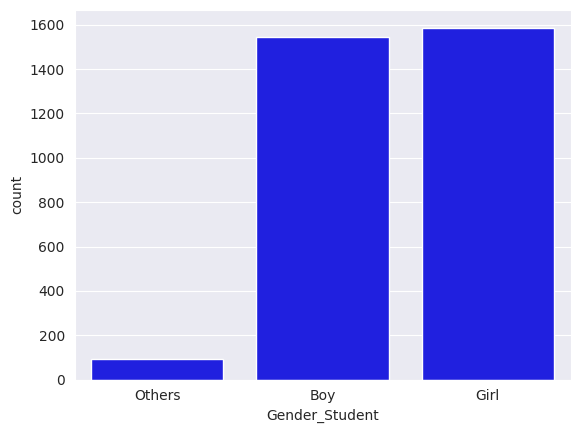

In [158]:
sns.countplot(data=tenth_atleast_one, x="Gender_Student" , color="b")